In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

**LOADING THE DATASET**

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

**INSPECTING THE DATA**

In [4]:
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferre

**HANDLING THE MISSING VALUES**

In [5]:
print("Missing values in movies:\n", movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())
print("Missing values in tags:\n", tags.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


**HANDLING DUPLICATE RECORDS**

In [6]:
print("Duplicates in ratings: ", ratings.duplicated().sum())
print("Duplicates in tags: ", tags.duplicated().sum())

Duplicates in ratings:  0
Duplicates in tags:  0


**DETECTING AND TREATING OUTLIERS**

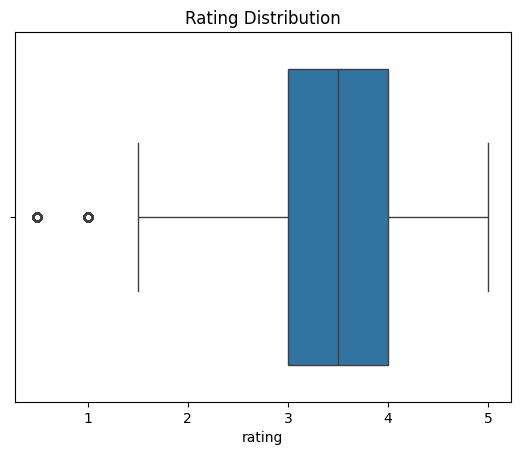

In [7]:
sns.boxplot(x = ratings['rating'])
plt.title('Rating Distribution')
plt.show()

**CONVERTING DATA TYPES AND ENSURING CONSISTENCY**

In [8]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit = 's')

In [10]:
print(ratings['timestamp'])
print(tags['timestamp'])

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]
0      2015-10-24 19:29:54
1      2015-10-24 19:29:56
2      2015-10-24 19:29:52
3      2015-10-24 19:33:27
4      2015-10-24 19:33:20
               ...        
3678   2007-02-11 22:46:59
3679   2007-03-08 22:18:54
3680   2017-05-03 20:39:44
3681   2017-05-03 20:39:38
3682   2017-05-03 20:44:30
Name: timestamp, Length: 3683, dtype: datetime64[ns]


**ENCODING CATEGORICAL VARIABLES**

In [13]:
# Split genres into lists
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Create one-hot encoding for genres
all_genres = sorted(list({genre for sublist in movies['genres'] for genre in sublist}))
for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

In [14]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com

**NORMALIZING AND STANDARDIZING FEATURES**

In [15]:
#count ratings per movie
movie_rating_counts = ratings.groupby('movieId').size().reset_index(name = 'rating_count')

#Normalizing rating counts
scaler = MinMaxScaler()
movie_rating_counts['rating_count_normalized'] = scaler.fit_transform(movie_rating_counts[['rating_count']])

In [21]:
print(movie_rating_counts)

      movieId  rating_count  rating_count_normalized
0           1           215                 0.652439
1           2           110                 0.332317
2           3            52                 0.155488
3           4             7                 0.018293
4           5            49                 0.146341
...       ...           ...                      ...
9719   193581             1                 0.000000
9720   193583             1                 0.000000
9721   193585             1                 0.000000
9722   193587             1                 0.000000
9723   193609             1                 0.000000

[9724 rows x 3 columns]


**MERGING DATASETS**

In [ ]:
movies = movies.merge(movie_rating_counts, on='movieId', how='left')
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')

In [22]:
print(movies)
print(ratings)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com